# Project Two: Correlation between Sentiment Analysis and Stock Movement

In [1]:
# Import necessary libraries
import numpy as np
from dotenv import load_dotenv
import os
import pandas as pd

# Added for gathering news data
from newsapi import NewsApiClient

# Added for sentiment analysis
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from datetime import datetime

# Added for regular expressions/text preprocessing
import re  

# Added to get stock price data
import yfinance as yf

# Added for visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# Import encoder from sklearn
from sklearn.preprocessing import StandardScaler

## Sentiment Analysis

In [88]:
# Download/Update the VADER Lexicon
nltk.download("vader_lexicon")

# Initialize the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Load environment variables and read the News API key from the environment variable
load_dotenv(r"C:\Users\5th gen\Dropbox\PC\Desktop\FinTech & Machine Learning Bootcamp\example.env")
api_key = os.getenv("NEWS_API_KEY2")

# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

# List of companies to fetch news for
companies = [
    "Google",
    "Amazon",
    "Microsoft",
    "Apple",
    "Tesla",
    "META",
    "Walmart",
    "Verizon",
    "Samsung"
]

# Define the start and end date in the format "YYYY-MM-DD"
start_date = "2023-11-09"
end_date = "2023-12-06"

# Convert the date strings to datetime objects
start_datetime = datetime.strptime(start_date, "%Y-%m-%d")
end_datetime = datetime.strptime(end_date, "%Y-%m-%d")

# Create a dictionary to store sentiment data for each company
company_sentiments = {}

# Define a function for text preprocessing
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove special characters, numbers, and extra spaces
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Remove extra spaces
    text = ' '.join(text.split())
    
    return text

# Fetch news articles for each company and preprocess them
for company in companies:
    # Fetch news articles for the current company
    news_articles = newsapi.get_everything(
        q=company,
        language="en",
        from_param=start_datetime.strftime("%Y-%m-%dT%H:%M:%SZ"),
        to=end_datetime.strftime("%Y-%m-%dT%H:%M:%SZ"),
        page_size=100,
        sort_by="relevancy"
    )

    # Print total articles for the current company
    print(f"Total articles about {company}: {news_articles['totalResults']}")

    # Initialize a list to store sentiment data for the current company
    company_sentiment_data = []

    # Create DataFrame for the current company's sentiment data 
    for article in news_articles["articles"]:
        try:
            text = article["content"]
            date = article["publishedAt"][:10]

            # Preprocessing steps
            text = preprocess_text(text)

            sentiment = sia.polarity_scores(text)
            compound = sentiment["compound"]
            pos = sentiment["pos"]
            neu = sentiment["neu"]
            neg = sentiment["neg"]

            company_sentiment_data.append({

                "date": date,
                "compound": compound, # removed all the unnecessary columns, such as positive, negative, text, neutral

            })

        except AttributeError:
            pass

    # Create DataFrame for the current company's sentiment data
    company_df = pd.DataFrame(company_sentiment_data)

    # Reorder DataFrame columns
    cols = ["date", "compound"]
    company_df = company_df[cols]

    # Store the sentiment data DataFrame in the dictionary
    company_sentiments[company] = company_df

[nltk_data] Downloading package vader_lexicon to C:\Users\5th
[nltk_data]     gen\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
Python-dotenv could not parse statement starting at line 3


Total articles about Google: 31995
Total articles about Amazon: 34747
Total articles about Microsoft: 12294
Total articles about Apple: 24198
Total articles about Tesla: 6455
Total articles about META: 8513
Total articles about Walmart: 6451
Total articles about Verizon: 1093
Total articles about Samsung: 6629


In [89]:
# Sort the index of the dataframe
company_df.sort_index(inplace=True)

In [90]:
# Create a dataframe for each brand
google_sent_df = company_sentiments["Google"]
amazon_sent_df = company_sentiments["Amazon"]
meta_sent_df = company_sentiments["META"]
tesla_sent_df=company_sentiments["Tesla"]
walmart_sent_df = company_sentiments["Walmart"]
samsung_sent_df = company_sentiments["Samsung"]
apple_sent_df = company_sentiments["Apple"]
microsoft_sent_df = company_sentiments["Microsoft"]
verizon_sent_df = company_sentiments["Verizon"]

In [91]:
# Set "date" as the index for each dataframe
google_sent_df.set_index("date", inplace=True)
amazon_sent_df.set_index("date", inplace=True)
meta_sent_df.set_index("date", inplace=True)
tesla_sent_df.set_index("date", inplace=True)
walmart_sent_df.set_index("date", inplace=True)
samsung_sent_df.set_index("date", inplace=True)
apple_sent_df.set_index("date", inplace=True)
microsoft_sent_df.set_index("date", inplace=True)
verizon_sent_df.set_index("date", inplace=True)

____

___________________

# Stock Price Analysis

In [122]:
# Dictionary to map symbols to company names
symbols = {
    "GOOGL": "Google",
    "AMZN": "Amazon",
    "MSFT": "Microsoft",
    "AAPL": "Apple",
    "TSLA": "Tesla",
    "META": "META",
    "WMT": "Walmart",
    "VZ": "Verizon",
    "005930.KS": "Samsung"
}


# Define the date range
start_date = "2023-11-09"
end_date = "2023-12-06"

# Create an empty DataFrame to store the closing prices
closing_prices_df = pd.DataFrame()

# Fetch closing price data for each stock
for symbol in symbols:
    # Download historical data
    stock_data = yf.download(symbol, start=start_date, end=end_date)
    
    # Extract the closing prices
    closing_prices = stock_data["Adj Close"]
    
    # Rename the column with the corresponding company name
    closing_prices = closing_prices.rename(symbols[symbol])
    
    # Concatenate the closing prices into the DataFrame
    if closing_prices_df.empty:
        closing_prices_df = closing_prices
    else:
        closing_prices_df = pd.concat([closing_prices_df, closing_prices], axis=1)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [125]:
closing_prices_df = closing_prices_df.dropna()

In [126]:
# Calculate percent changes for each stock
percent_changes_df = closing_prices_df.pct_change()

# Drop rows with NaN values
percent_changes_df.dropna(inplace=True)

In [127]:
# Create separate dataframes for each stock's price changes per day
amazon_stock = percent_changes_df["Amazon"]
google_stock = percent_changes_df["Google"]
microsoft_stock = percent_changes_df["Microsoft"]
apple_stock = percent_changes_df["Apple"]
tesla_stock = percent_changes_df["Tesla"]
meta_stock = percent_changes_df["META"]
walmart_stock = percent_changes_df["Walmart"]
verizon_stock = percent_changes_df["Verizon"]
samsung_stock = percent_changes_df["Samsung"]
verizon_stock = percent_changes_df["Verizon"]

In [128]:
# List of companies to analyze
companies_to_analyze = ["Google", "Amazon", "Microsoft", "Apple", "Tesla", "META", "Walmart", "Samsung", "Verizon"]

# Create a dictionary to store average compound DataFrames
average_compound_data = {}

for company in companies_to_analyze:
    # Group the DataFrame by the date and calculate the mean of the compound values
    company_compound_avg_df = company_sentiments[company].groupby("date")["compound"].mean().reset_index()

    # Set the date column as the index
    company_compound_avg_df.set_index("date", inplace=True)

    # Store the average compound DataFrame in the dictionary
    average_compound_data[company] = company_compound_avg_df


### Sentiment of the company

This data should be used to assess how each company has been faring in the media. This data shows if the news is good, bad or neutral.

In [129]:
# Calculate the average compound data for each company
amazon_compound_avg_df = average_compound_data["Amazon"]
google_compound_avg_df=average_compound_data["Google"]
tesla_compound_avg_df=average_compound_data["Tesla"]
microsoft_compound_avg_df=average_compound_data["Microsoft"]
apple_compound_avg_df=average_compound_data["Apple"]
meta_compound_avg_df=average_compound_data["META"]
walmart_compound_avg_df=average_compound_data["Walmart"]
samsung_compound_avg_df=average_compound_data["Samsung"]
verizon_compound_avg_df=average_compound_data["Verizon"]

In [130]:
# Calculate the average compound score for each company
amazon_compound_avg = amazon_compound_avg_df.mean()
google_compound_avg = google_compound_avg_df.mean()
tesla_compound_avg = tesla_compound_avg_df.mean()
microsoft_compound_avg = microsoft_compound_avg_df.mean()
apple_compound_avg = apple_compound_avg_df.mean()
meta_compound_avg = meta_compound_avg_df.mean()
walmart_compound_avg = walmart_compound_avg_df.mean()
samsung_compound_avg = samsung_compound_avg_df.mean()
verizon_compound_avg = verizon_compound_avg_df.mean()

# Print the average compound score for each company
print(f"Amazon Average Compound Score: {amazon_compound_avg}")
print(f"Google Average Compound Score: {google_compound_avg}")
print(f"Tesla Average Compound Score: {tesla_compound_avg}")
print(f"Microsoft Average Compound Score: {microsoft_compound_avg}")
print(f"Apple Average Compound Score: {apple_compound_avg}")
print(f"META Average Compound Score: {meta_compound_avg}")
print(f"Walmart Average Compound Score: {walmart_compound_avg}")
print(f"Samsung Average Compound Score: {samsung_compound_avg}")

Amazon Average Compound Score: compound    0.263275
dtype: float64
Google Average Compound Score: compound    0.211786
dtype: float64
Tesla Average Compound Score: compound   -0.127128
dtype: float64
Microsoft Average Compound Score: compound    0.157338
dtype: float64
Apple Average Compound Score: compound    0.260228
dtype: float64
META Average Compound Score: compound    0.277208
dtype: float64
Walmart Average Compound Score: compound    0.185664
dtype: float64
Samsung Average Compound Score: compound    0.300025
dtype: float64


#### NOTE: 
Use this code to see if there is a positive or negative correlation between the sentiment and stock movement, if:
- its a positive correlation, then the stock price would go up as the sentiment goes up, and if its a negative correlation then the stock price would go down
- its a negative correlation, then stock price would move inversely
- its close to zero than the stock price is not impacted by the sentiment

_______________________________________________________________________________

#### Cumulative sentiment and stock data

In [150]:
# Cumulative data of sentiment analysis (compound) value
microsoft_sent_cumsum= microsoft_compound_avg_df.cumsum()
google_sent_cumsum=google_compound_avg_df.cumsum()
tesla_sent_cumsum = tesla_compound_avg_df.cumsum()
amazon_sent_cumsum = amazon_compound_avg_df.cumsum()
apple_sent_cumsum = apple_compound_avg_df.cumsum()
meta_sent_cumsum = meta_compound_avg_df.cumsum()
walmart_sent_cumsum = walmart_compound_avg_df.cumsum()
samsung_sent_cumsum= samsung_compound_avg_df.cumsum()
verizon_sent_cumsum= verizon_compound_avg_df.cumsum()

In [151]:
# Calculate cumulative stock price data
microsoft_stock_cumsum= microsoft_stock.cumsum()
google_stock_cumsum=google_stock.cumsum()
tesla_stock_cumsum =tesla_stock.cumsum()
apple_stock_cumsum = apple_stock.cumsum()
meta_stock_cumsum = meta_stock.cumsum()
walmart_stock_cumsum = walmart_stock.cumsum()
samsung_stock_cumsum = samsung_stock.cumsum()
verizon_stock_cumsum = verizon_stock.cumsum()
amazon_stock_cumsum = amazon_stock.cumsum()

#### NOTE:
Use this data for the creation of graphs to show correlation. It is only for visualisation and **has no bearing on the calculation of the correlation coefficient and should not be used for that.**

# Individual Company Analysis

### 1. Verizon Analysis

In [142]:
# Convert the date index to datetime objects for both dataframes
verizon_compound_avg_df.index = pd.to_datetime(verizon_compound_avg_df.index)
verizon_stock.index = pd.to_datetime(verizon_stock.index)

# Merge the two dataframes on their date indices
merged_df_verizon = pd.merge(verizon_compound_avg_df, verizon_stock, left_index=True, right_index=True)

# Calculate the correlation coefficient
correlation_coefficient = merged_df_verizon["compound"].corr(merged_df_verizon["Verizon"])

# Display the correlation coefficient
print(f"Verizon Correlation coefficient and stock price movement: {correlation_coefficient:.4f}")


Verizon Correlation coefficient and stock price movement: 0.0450


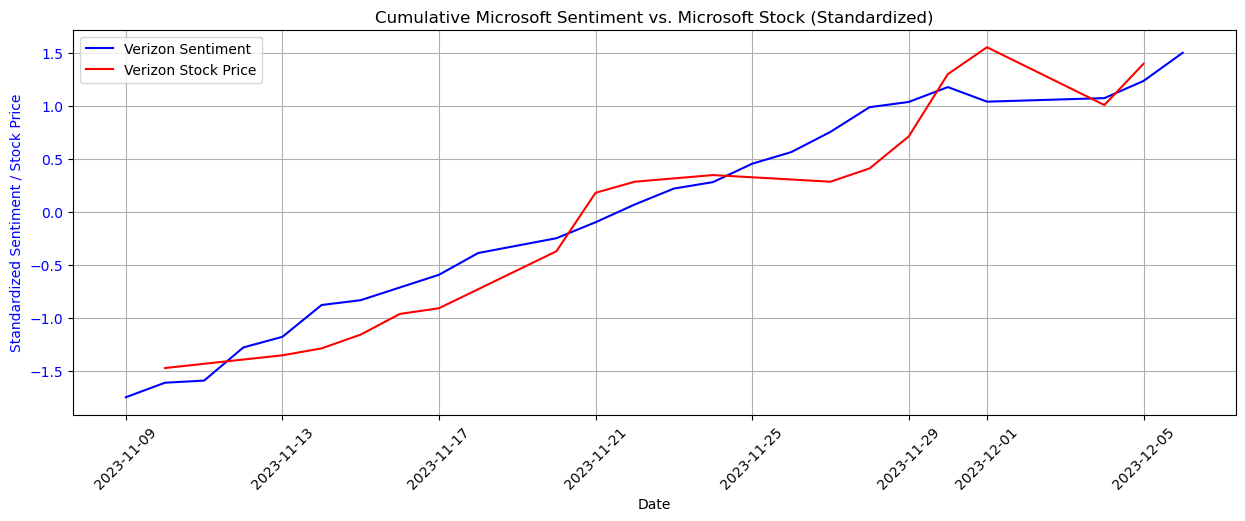

In [143]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Convert the index to a DatetimeIndex
verizon_sent_cumsum.index = pd.to_datetime(verizon_sent_cumsum.index)
verizon_stock_cumsum.index = pd.to_datetime(verizon_stock_cumsum.index)

# Standardize both sentiment and stock price cumulative data
verizon_sent_cumsum_scaled = scaler.fit_transform(verizon_sent_cumsum.values.reshape(-1, 1))
verizon_stock_cumsum_scaled = scaler.fit_transform(verizon_stock_cumsum.values.reshape(-1, 1))

# Create a figure and axis
fig, ax = plt.subplots(figsize=(15, 5))

# Plot the standardized sentiment data as a blue line on the primary y-axis
ax.plot(verizon_sent_cumsum.index, verizon_sent_cumsum_scaled, label='Verizon Sentiment', color='blue')
ax.set_xlabel('Date')
ax.set_ylabel('Standardized Sentiment / Stock Price', color='blue')
ax.tick_params(axis='y', labelcolor='blue')

# Plot the standardized stock price data as a red line on the same y-axis
ax.plot(verizon_stock_cumsum.index, verizon_stock_cumsum_scaled, label='Verizon Stock Price', color='red')

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Add a legend
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc="upper left")

# Set the title of the chart
plt.title('Cumulative Microsoft Sentiment vs. Microsoft Stock (Standardized)')

# Show the plot
plt.grid(True)
plt.show()

### 2. Amazon Analysis

In [103]:
# Convert the date index to datetime objects for both dataframes
amazon_compound_avg_df.index = pd.to_datetime(amazon_compound_avg_df.index)
amazon_stock.index = pd.to_datetime(amazon_stock.index)

# Merge the two dataframes on their date indices
merged_df_amazon= pd.merge(amazon_compound_avg_df, amazon_stock, left_index=True, right_index=True)

# Calculate the correlation coefficient
amazon_cc = merged_df_amazon["compound"].corr(merged_df_amazon["Amazon"])

# Display the correlation coefficient
print(f"Amazon's Sentiment and Price Correlation is {amazon_cc:.4f}")

Amazon's Sentiment and Price Correlation is 0.1587


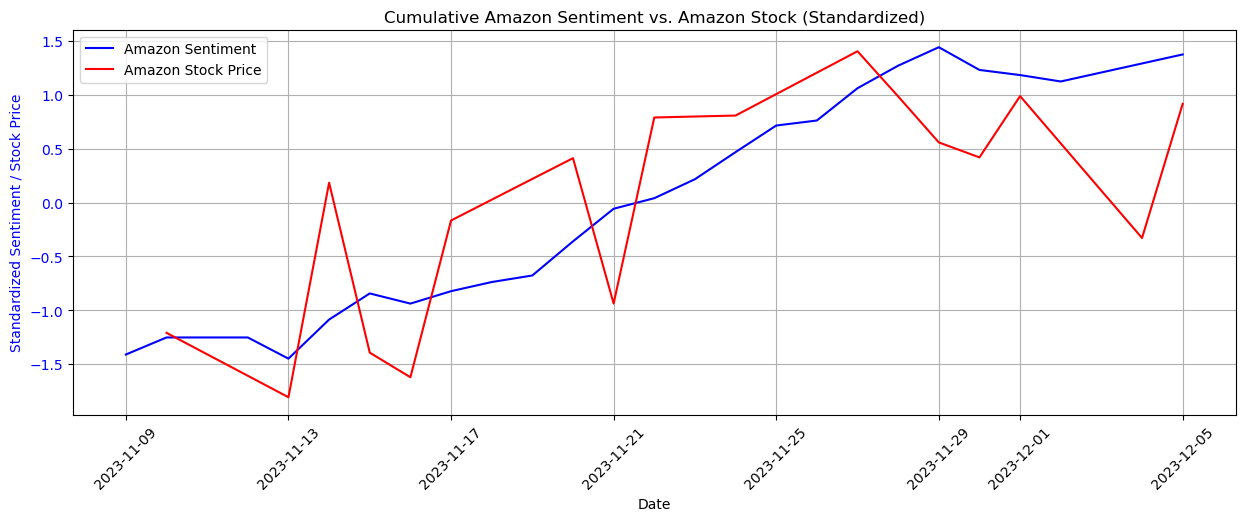

In [140]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Convert the index to a DatetimeIndex
amazon_sent_cumsum.index = pd.to_datetime(amazon_sent_cumsum.index)
amazon_stock_cumsum.index = pd.to_datetime(amazon_stock_cumsum.index)

# Standardize both sentiment and stock price cumulative data for Amazon
amazon_sent_cumsum_scaled = scaler.fit_transform(amazon_sent_cumsum.values.reshape(-1, 1))
amazon_stock_cumsum_scaled = scaler.fit_transform(amazon_stock_cumsum.values.reshape(-1, 1))

# Create a figure and axis
fig, ax = plt.subplots(figsize=(15, 5))

# Plot the standardized sentiment data as a blue line on the primary y-axis
ax.plot(amazon_sent_cumsum.index, amazon_sent_cumsum_scaled, label='Amazon Sentiment', color='blue')
ax.set_xlabel('Date')
ax.set_ylabel('Standardized Sentiment / Stock Price', color='blue')
ax.tick_params(axis='y', labelcolor='blue')

# Plot the standardized stock price data as a red line on the same y-axis
ax.plot(amazon_stock_cumsum.index, amazon_stock_cumsum_scaled, label='Amazon Stock Price', color='red')

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Add a legend
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc="upper left")

# Set the title of the chart
plt.title('Cumulative Amazon Sentiment vs. Amazon Stock (Standardized)')

# Show the plot
plt.grid(True)
plt.show()

### 3. Google Analysis

In [105]:
# Convert the date index to datetime objects for both dataframes
google_compound_avg_df.index = pd.to_datetime(google_compound_avg_df.index)
google_stock.index = pd.to_datetime(google_stock.index)

# Merge the two dataframes on their date indices
merged_df_google= pd.merge(google_compound_avg_df, google_stock, left_index=True, right_index=True)

# Calculate the correlation coefficient
google_cc = merged_df_google["compound"].corr(merged_df_google["Google"])

# Display the correlation coefficient
print(f"Google's Sentiment and Price Correlation is {google_cc:.4f}")

Google's Sentiment and Price Correlation is 0.3344


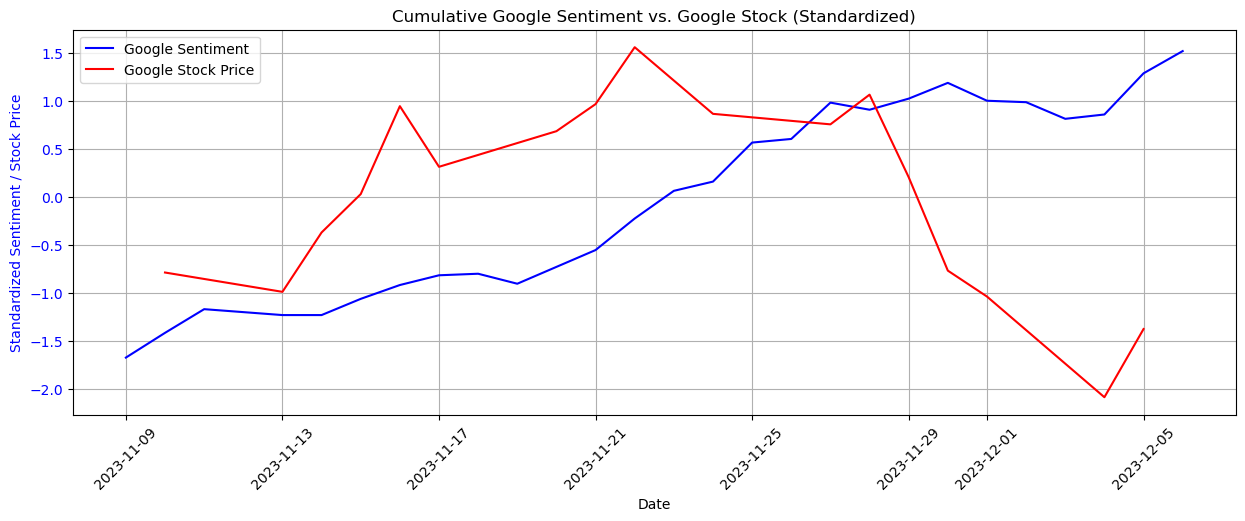

In [139]:
# Convert the index to a DatetimeIndex
google_sent_cumsum.index = pd.to_datetime(google_sent_cumsum.index)
google_stock_cumsum.index = pd.to_datetime(google_stock_cumsum.index)

# Create a StandardScaler instance
scaler = StandardScaler()

# Standardize both sentiment and stock price cumulative data for Google
google_sent_cumsum_scaled = scaler.fit_transform(google_sent_cumsum.values.reshape(-1, 1))
google_stock_cumsum_scaled = scaler.fit_transform(google_stock_cumsum.values.reshape(-1, 1))

# Create a figure and axis
fig, ax = plt.subplots(figsize=(15, 5))

# Plot the standardized sentiment data as a blue line on the primary y-axis
ax.plot(google_sent_cumsum.index, google_sent_cumsum_scaled, label='Google Sentiment', color='blue')
ax.set_xlabel('Date')
ax.set_ylabel('Standardized Sentiment / Stock Price', color='blue')
ax.tick_params(axis='y', labelcolor='blue')

# Plot the standardized stock price data as a red line on the same y-axis
ax.plot(google_stock_cumsum.index, google_stock_cumsum_scaled, label='Google Stock Price', color='red')

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Add a legend
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc="upper left")

# Set the title of the chart
plt.title('Cumulative Google Sentiment vs. Google Stock (Standardized)')

# Show the plot
plt.grid(True)
plt.show()

### 4. Tesla Analysis

In [107]:
# Convert the date index to datetime objects for both dataframes
tesla_compound_avg_df.index = pd.to_datetime(tesla_compound_avg_df.index)
tesla_stock.index = pd.to_datetime(tesla_stock.index)

# Merge the two dataframes on their date indices
merged_df_tesla= pd.merge(tesla_compound_avg_df, tesla_stock, left_index=True, right_index=True)

# Calculate the correlation coefficient
tesla_cc = merged_df_tesla["compound"].corr(merged_df_tesla["Tesla"])

# Display the correlation coefficient
print(f"Tesla's Sentiment and Price Correlation is {tesla_cc:.4f}")

Tesla's Sentiment and Price Correlation is 0.3878


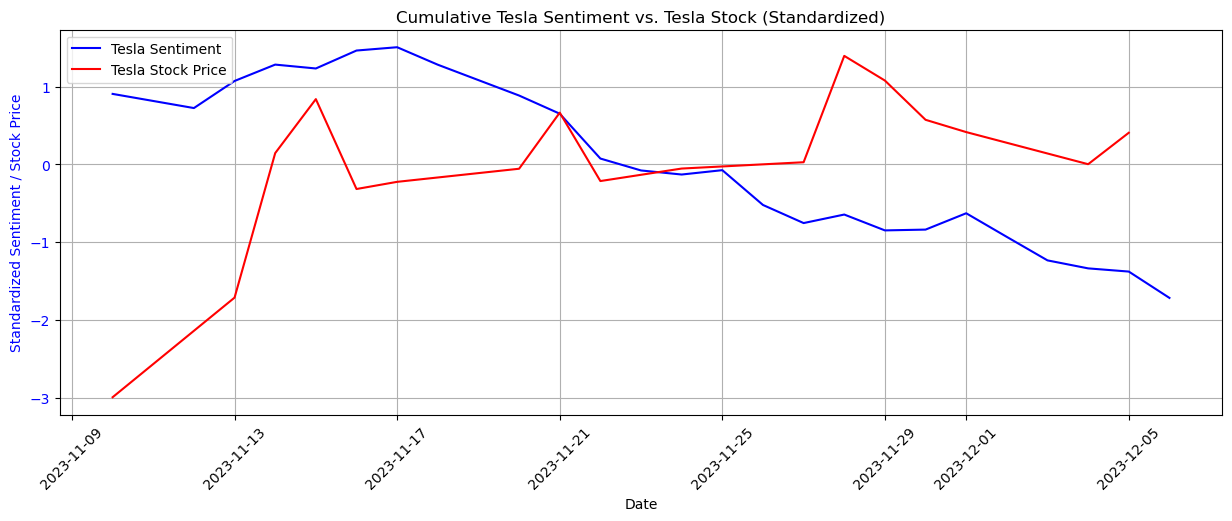

In [152]:
# Convert the index to a DatetimeIndex
tesla_sent_cumsum.index = pd.to_datetime(tesla_sent_cumsum.index)
tesla_stock_cumsum.index = pd.to_datetime(tesla_stock_cumsum.index)

# Create a StandardScaler instance
scaler = StandardScaler()

# Standardize both sentiment and stock price cumulative data for Tesla
tesla_sent_cumsum_scaled = scaler.fit_transform(tesla_sent_cumsum.values.reshape(-1, 1))
tesla_stock_cumsum_scaled = scaler.fit_transform(tesla_stock_cumsum.values.reshape(-1, 1))

# Create a figure and axis
fig, ax = plt.subplots(figsize=(15, 5))

# Plot the standardized sentiment data as a blue line on the primary y-axis
ax.plot(tesla_sent_cumsum.index, tesla_sent_cumsum_scaled, label='Tesla Sentiment', color='blue')
ax.set_xlabel('Date')
ax.set_ylabel('Standardized Sentiment / Stock Price', color='blue')
ax.tick_params(axis='y', labelcolor='blue')

# Plot the standardized stock price data as a red line on the same y-axis
ax.plot(tesla_stock_cumsum.index, tesla_stock_cumsum_scaled, label='Tesla Stock Price', color='red')

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Add a legend
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc="upper left")

# Set the title of the chart
plt.title('Cumulative Tesla Sentiment vs. Tesla Stock (Standardized)')

# Show the plot
plt.grid(True)
plt.show()


### 5. Microsoft Analysis

In [112]:
# Convert the date index to datetime objects for both dataframes
microsoft_compound_avg_df.index = pd.to_datetime(microsoft_compound_avg_df.index)
microsoft_stock.index = pd.to_datetime(microsoft_stock.index)

# Merge the two dataframes on their date indices
merged_df_microsoft= pd.merge(microsoft_compound_avg_df, microsoft_stock, left_index=True, right_index=True)

# Calculate the correlation coefficient
microsoft_cc = merged_df_microsoft["compound"].corr(merged_df_microsoft["Microsoft"])

# Display the correlation coefficient
print(f"Microsoft's Sentiment and Price Correlation is {microsoft_cc:.4f}")

Microsoft's Sentiment and Price Correlation is -0.3207


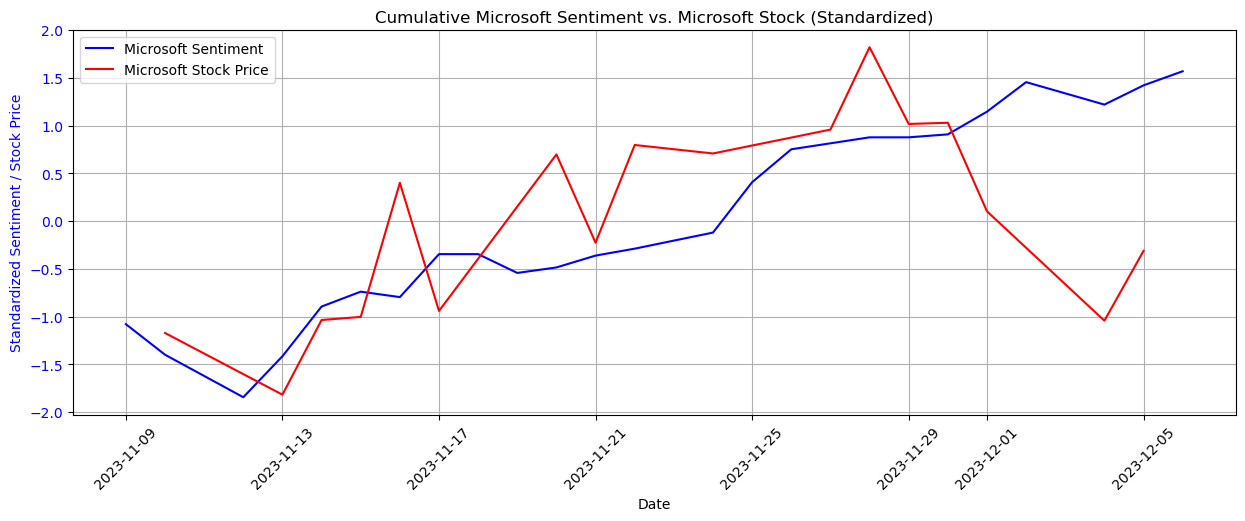

In [137]:
# Convert the index to a DatetimeIndex
microsoft_sent_cumsum.index = pd.to_datetime(microsoft_sent_cumsum.index)
microsoft_stock_cumsum.index = pd.to_datetime(microsoft_stock_cumsum.index)

# Create a StandardScaler instance
scaler = StandardScaler()

# Standardize both sentiment and stock price cumulative data
microsoft_sent_cumsum_scaled = scaler.fit_transform(microsoft_sent_cumsum.values.reshape(-1, 1))
microsoft_stock_cumsum_scaled = scaler.fit_transform(microsoft_stock_cumsum.values.reshape(-1, 1))

# Create a figure and axis
fig, ax = plt.subplots(figsize=(15, 5))

# Plot the standardized sentiment data as a blue line on the primary y-axis
ax.plot(microsoft_sent_cumsum.index, microsoft_sent_cumsum_scaled, label='Microsoft Sentiment', color='blue')
ax.set_xlabel('Date')
ax.set_ylabel('Standardized Sentiment / Stock Price', color='blue')
ax.tick_params(axis='y', labelcolor='blue')

# Plot the standardized stock price data as a red line on the same y-axis
ax.plot(microsoft_stock_cumsum.index, microsoft_stock_cumsum_scaled, label='Microsoft Stock Price', color='red')

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Add a legend
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc="upper left")

# Set the title of the chart
plt.title('Cumulative Microsoft Sentiment vs. Microsoft Stock (Standardized)')

# Show the plot
plt.grid(True)
plt.show()

### 6. Walmart Analysis

In [114]:
# Convert the date index to datetime objects for both dataframes
walmart_compound_avg_df.index = pd.to_datetime(walmart_compound_avg_df.index)
walmart_stock.index = pd.to_datetime(walmart_stock.index)

# Merge the two dataframes on their date indices
merged_df_walmart= pd.merge(walmart_compound_avg_df, walmart_stock, left_index=True, right_index=True)

# Calculate the correlation coefficient
walmart_cc = merged_df_walmart["compound"].corr(merged_df_walmart["Walmart"])

# Display the correlation coefficient
print(f"Walmart's Sentiment and Price Correlation is {walmart_cc:.4f}")

Walmart's Sentiment and Price Correlation is 0.1085


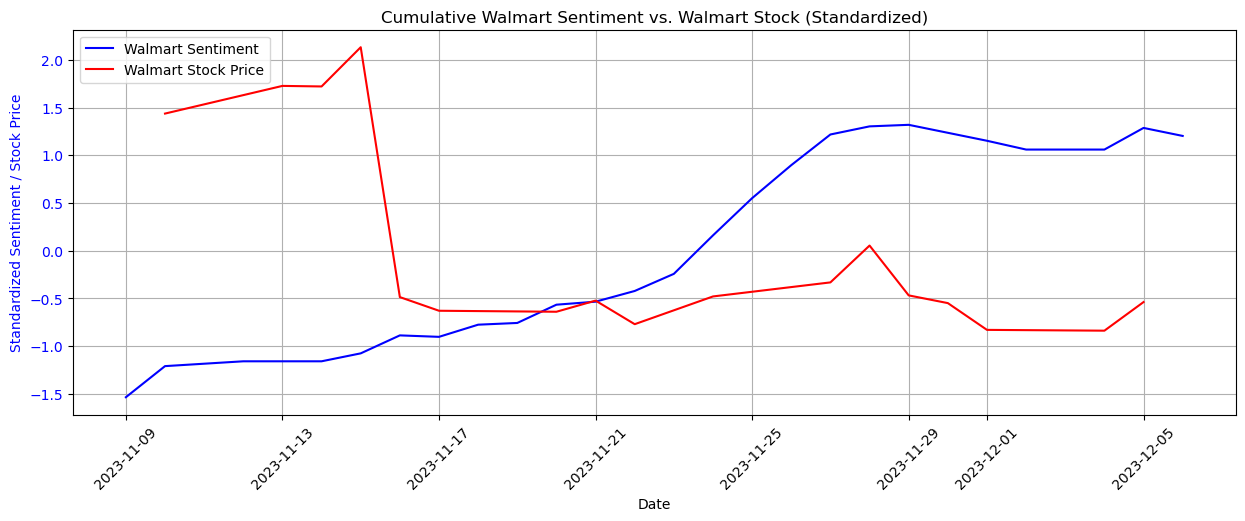

In [136]:
# Convert the index to a DatetimeIndex
walmart_sent_cumsum.index = pd.to_datetime(walmart_sent_cumsum.index)
walmart_stock_cumsum.index = pd.to_datetime(walmart_stock_cumsum.index)

# Create a StandardScaler instance
scaler = StandardScaler()

# Standardize both sentiment and stock price cumulative data for Walmart
walmart_sent_cumsum_scaled = scaler.fit_transform(walmart_sent_cumsum.values.reshape(-1, 1))
walmart_stock_cumsum_scaled = scaler.fit_transform(walmart_stock_cumsum.values.reshape(-1, 1))

# Create a figure and axis
fig, ax = plt.subplots(figsize=(15, 5))

# Plot the standardized sentiment data as a blue line on the primary y-axis
ax.plot(walmart_sent_cumsum.index, walmart_sent_cumsum_scaled, label='Walmart Sentiment', color='blue')
ax.set_xlabel('Date')
ax.set_ylabel('Standardized Sentiment / Stock Price', color='blue')
ax.tick_params(axis='y', labelcolor='blue')

# Plot the standardized stock price data as a red line on the same y-axis
ax.plot(walmart_stock_cumsum.index, walmart_stock_cumsum_scaled, label='Walmart Stock Price', color='red')

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Add a legend
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc="upper left")

# Set the title of the chart
plt.title('Cumulative Walmart Sentiment vs. Walmart Stock (Standardized)')

# Show the plot
plt.grid(True)
plt.show()


### 7. Samsung Analysis

In [116]:
# Convert the date index to datetime objects for both dataframes
samsung_compound_avg_df.index = pd.to_datetime(samsung_compound_avg_df.index)
samsung_stock.index = pd.to_datetime(samsung_stock.index)

# Merge the two dataframes on their date indices
merged_df_samsung= pd.merge(samsung_compound_avg_df, samsung_stock, left_index=True, right_index=True)

# Calculate the correlation coefficient
samsung_cc = merged_df_samsung["compound"].corr(merged_df_samsung["Samsung"])

# Display the correlation coefficient
print(f"Samsungs's Sentiment and Price Correlation is {samsung_cc:.4f}")

Samsungs's Sentiment and Price Correlation is 0.4007


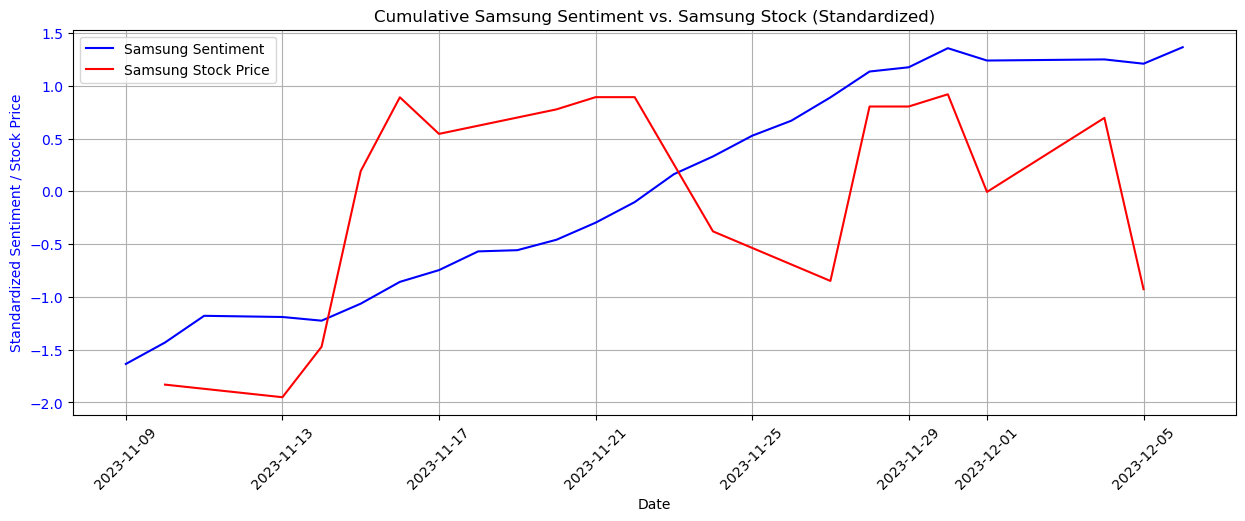

In [135]:
# Convert the index to a DatetimeIndex
samsung_sent_cumsum.index = pd.to_datetime(samsung_sent_cumsum.index)
samsung_stock_cumsum.index = pd.to_datetime(samsung_stock_cumsum.index)

# Create a StandardScaler instance
scaler = StandardScaler()

# Standardize both sentiment and stock price cumulative data for Samsung
samsung_sent_cumsum_scaled = scaler.fit_transform(samsung_sent_cumsum.values.reshape(-1, 1))
samsung_stock_cumsum_scaled = scaler.fit_transform(samsung_stock_cumsum.values.reshape(-1, 1))

# Create a figure and axis
fig, ax = plt.subplots(figsize=(15, 5))

# Plot the standardized sentiment data as a blue line on the primary y-axis
ax.plot(samsung_sent_cumsum.index, samsung_sent_cumsum_scaled, label='Samsung Sentiment', color='blue')
ax.set_xlabel('Date')
ax.set_ylabel('Standardized Sentiment / Stock Price', color='blue')
ax.tick_params(axis='y', labelcolor='blue')

# Plot the standardized stock price data as a red line on the same y-axis
ax.plot(samsung_stock_cumsum.index, samsung_stock_cumsum_scaled, label='Samsung Stock Price', color='red')

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Add a legend
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc="upper left")

# Set the title of the chart
plt.title('Cumulative Samsung Sentiment vs. Samsung Stock (Standardized)')

# Show the plot
plt.grid(True)
plt.show()


### 8. META Analysis

In [144]:
# Convert the date index to datetime objects for both dataframes
meta_compound_avg_df.index = pd.to_datetime(meta_compound_avg_df.index)
meta_stock.index = pd.to_datetime(meta_stock.index)

# Merge the two dataframes on their date indices
merged_df_meta= pd.merge(meta_compound_avg_df, meta_stock, left_index=True, right_index=True)

# Calculate the correlation coefficient
meta_cc = merged_df_meta["compound"].corr(merged_df_meta["META"])

# Display the correlation coefficient
print(f"Samsung's Sentiment and Price Correlation is {meta_cc:.4f}")

Samsung's Sentiment and Price Correlation is -0.2353


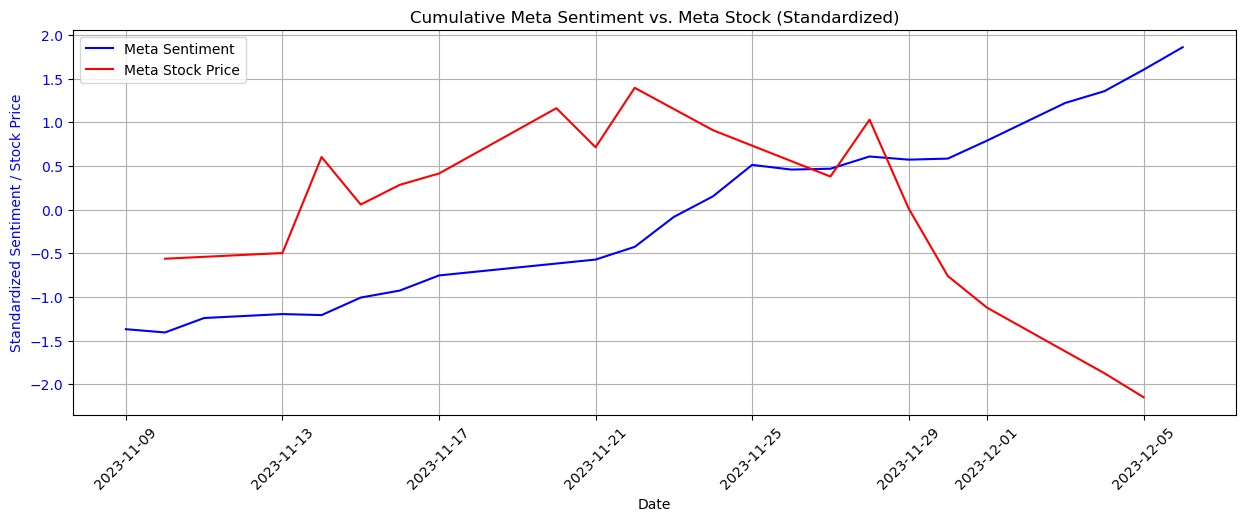

In [146]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Convert the index to a DatetimeIndex
meta_sent_cumsum.index = pd.to_datetime(meta_sent_cumsum.index)
meta_stock_cumsum.index = pd.to_datetime(meta_stock_cumsum.index)

# Standardize both sentiment and stock price cumulative data for Meta
meta_sent_cumsum_scaled = scaler.fit_transform(meta_sent_cumsum.values.reshape(-1, 1))
meta_stock_cumsum_scaled = scaler.fit_transform(meta_stock_cumsum.values.reshape(-1, 1))

# Create a figure and axis
fig, ax = plt.subplots(figsize=(15, 5))

# Plot the standardized sentiment data as a blue line on the primary y-axis
ax.plot(meta_sent_cumsum.index, meta_sent_cumsum_scaled, label='Meta Sentiment', color='blue')
ax.set_xlabel('Date')
ax.set_ylabel('Standardized Sentiment / Stock Price', color='blue')
ax.tick_params(axis='y', labelcolor='blue')

# Plot the standardized stock price data as a red line on the same y-axis
ax.plot(meta_stock_cumsum.index, meta_stock_cumsum_scaled, label='Meta Stock Price', color='red')

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Add a legend
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc="upper left")

# Set the title of the chart
plt.title('Cumulative Meta Sentiment vs. Meta Stock (Standardized)')

# Show the plot
plt.grid(True)
plt.show()


### Apple Analysis

In [120]:
# Convert the date index to datetime objects for both dataframes
apple_compound_avg_df.index = pd.to_datetime(apple_compound_avg_df.index)
apple_stock.index = pd.to_datetime(apple_stock.index)

# Merge the two dataframes on their date indices
merged_df_apple= pd.merge(apple_compound_avg_df, apple_stock, left_index=True, right_index=True)

# Calculate the correlation coefficient
apple_cc = merged_df_apple["compound"].corr(merged_df_apple["Apple"])

# Display the correlation coefficient
print(f"Apple's Sentiment and Price Correlation is {apple_cc:.4f}")

Apple's Sentiment and Price Correlation is -0.4234


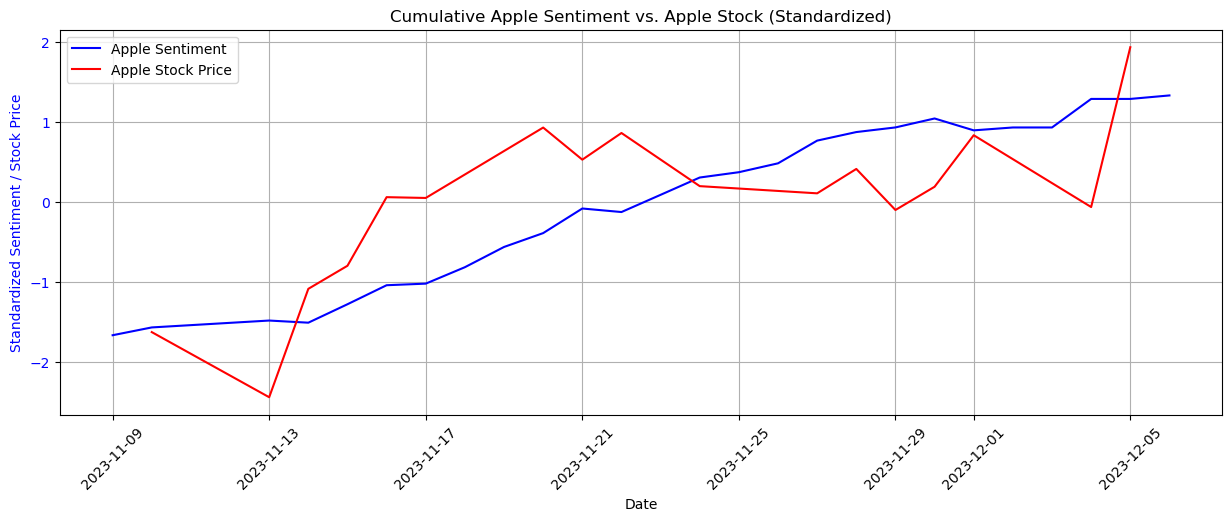

In [153]:
# Convert the dataframes to the right format
apple_sent_cumsum.index = pd.to_datetime(apple_sent_cumsum.index)
apple_stock_cumsum.index = pd.to_datetime(apple_stock_cumsum.index)

# Create a StandardScaler instance
scaler = StandardScaler()

# Standardize both sentiment and stock price cumulative data for Apple
apple_sent_cumsum_scaled = scaler.fit_transform(apple_sent_cumsum.values.reshape(-1, 1))
apple_stock_cumsum_scaled = scaler.fit_transform(apple_stock_cumsum.values.reshape(-1, 1))

# Create a figure and axis
fig, ax = plt.subplots(figsize=(15, 5))

# Plot the standardized sentiment data as a blue line on the primary y-axis
ax.plot(apple_sent_cumsum.index, apple_sent_cumsum_scaled, label='Apple Sentiment', color='blue')
ax.set_xlabel('Date')
ax.set_ylabel('Standardized Sentiment / Stock Price', color='blue')
ax.tick_params(axis='y', labelcolor='blue')

# Plot the standardized stock price data as a red line on the same y-axis
ax.plot(apple_stock_cumsum.index, apple_stock_cumsum_scaled, label='Apple Stock Price', color='red')

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Add a legend
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc="upper left")

# Set the title of the chart
plt.title('Cumulative Apple Sentiment vs. Apple Stock (Standardized)')

# Show the plot
plt.grid(True)
plt.show()